# Using Napari-SpatialData 

This tutorial shows how to load SpatialData objects into the Napari-Spatialdata plugin, and use it with the "View" and "Scatter" widgets for visualising coordinates.

## Import packages and data

There are two options to install napari-spatialdata:

(1) Run `pip install napari-spatialdata`

or, 

(2) Clone this [repo](https://github.com/scverse/napari-spatialdata) and run `pip install -e .`


After installing napari-spatialdata, insert the file path of the dataset in the <em>FILE_PATH</em> variable below and execute the cell. This loads the dataset from the filepath and creates  a {class}`spatialdata.SpatialData` object. We'll use this object with the class `Interactive` to visualise this dataset in Napari.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from napari_spatialdata import Interactive
from spatialdata import SpatialData

plt.rcParams['figure.figsize'] = (20, 20)

FILE_PATH = "../../../data/cosmx/data.zarr" # Change this
sdata = SpatialData.read(FILE_PATH)

/opt/homebrew/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/rahulbshrestha/projects/spatialdata/src/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()
/opt/homebrew/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Visualise in napari

We can instantiate the `Interactive` class with our {class}`spatialdata.SpatialData` object, and view it in Napari.

In [16]:
interactive = Interactive(sdata)
interactive.run()

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:107: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-05-02 21:54:40.663 | INFO     | napari_spatialdata._categoricals_utils:_set_default_colors_for_categorical_obs:363 - the obs value 'Width' has more than 103 categories. Uniform 'grey' color will be used for all categories.
2023-05-02 22:02:12.881 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.
2023-05-02 22:02:20.842 | INFO     | 

This executes an empty Napari viewer. The SpatialData widget is in the bottom left hand corner and consists of two boxes, "Coordinate System" and "Elements". 

A {class}`spatialdata.SpatialData` object groups together five {obj}`spatialdata.models.SpatialElement`: Images (raster images), Labels (e.g. segmentation masks), Points (e.g. transcripts locations, molecular probes), Shapes (regions of interests, array capture locations etc.), and Table (where the molecular profiles and annotations are stored). Each SpatialElement can be associated with a coordinate system and the transformation required to align that element to it.

(-0.5, 2939.5, 1665.5, -0.5)

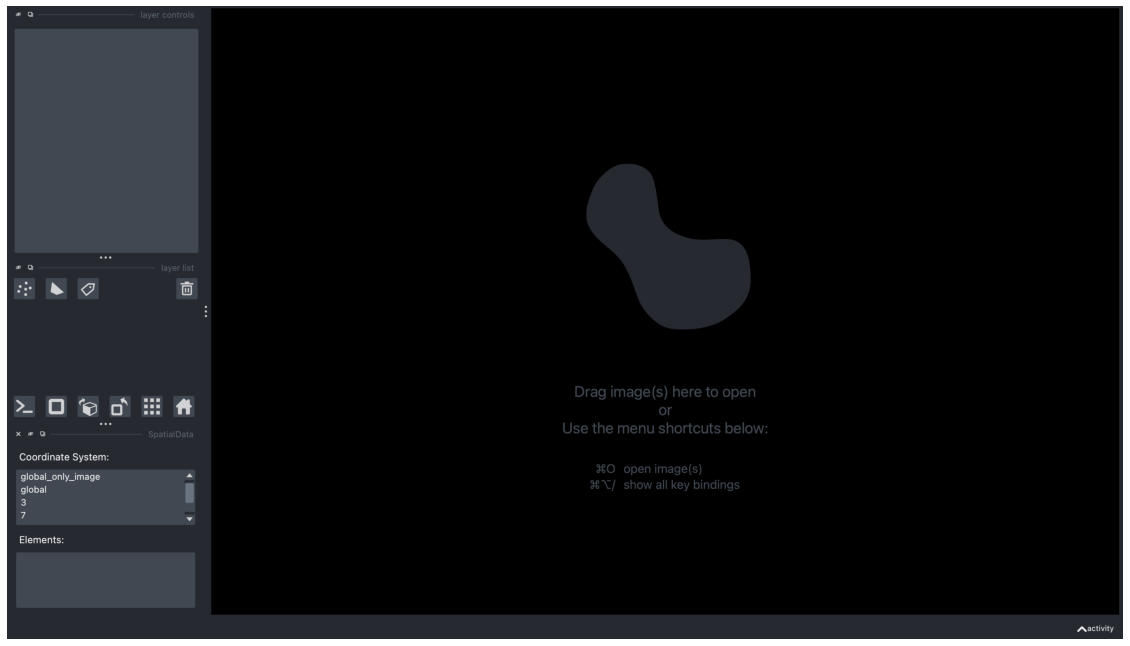

In [3]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can pick a coordinate system in the first box. This automatically updates the next box, which shows the elements associated with that coordinate system. Clicking on an element loads it as a layer into Napari.

In the example below, we selected the coordinate system "16" and loaded "16_image" and "16_labels" to the Napari viewer.

(-0.5, 2939.5, 1665.5, -0.5)

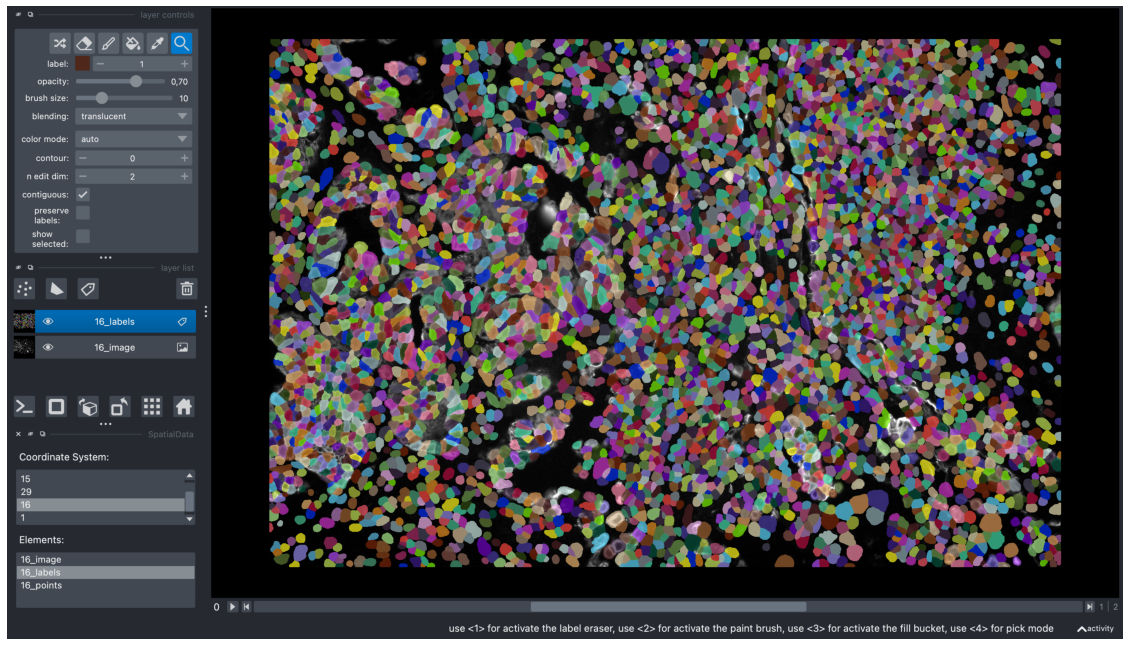

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-04-18 11:19:42.067 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_view.py:216: FutureWarning: Private attribute access ('Selection._current') in this context (e.g. inside a plugin widget or dock widget) is deprecated and will be unavailable in version 0.5.0
  layer = self._viewer.layers.selection._current
2023-04-18 11:19:42.081 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
2023-04-18 11:19:43.090 | INFO     | napari_spatialdata._view:_on_layer_update:204 - Updating layer.
/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatia

In [6]:
plt.imshow(interactive.screenshot())
plt.axis('off')

## Load axis with the view widget

Napari-SpatialData also comes with a "View" widget that can be used to load <em>obs</em>, <em>var</em> or <em>obsm</em>.

To open it, we can use the menu bar by going to Plugins > napari-spatialdata > View. The <em>obs</em>, <em>var</em> and <em>obsm</em> values associated with the anndata of the selected layer is shown.

To further examine a specific value, we can double click on any element on the View Widget to load it to the viewer. In the example below, we selected the layer "16_labels" and double clicked on the gene expression, "AATK" in the view widget.

(-0.5, 2939.5, 1857.5, -0.5)

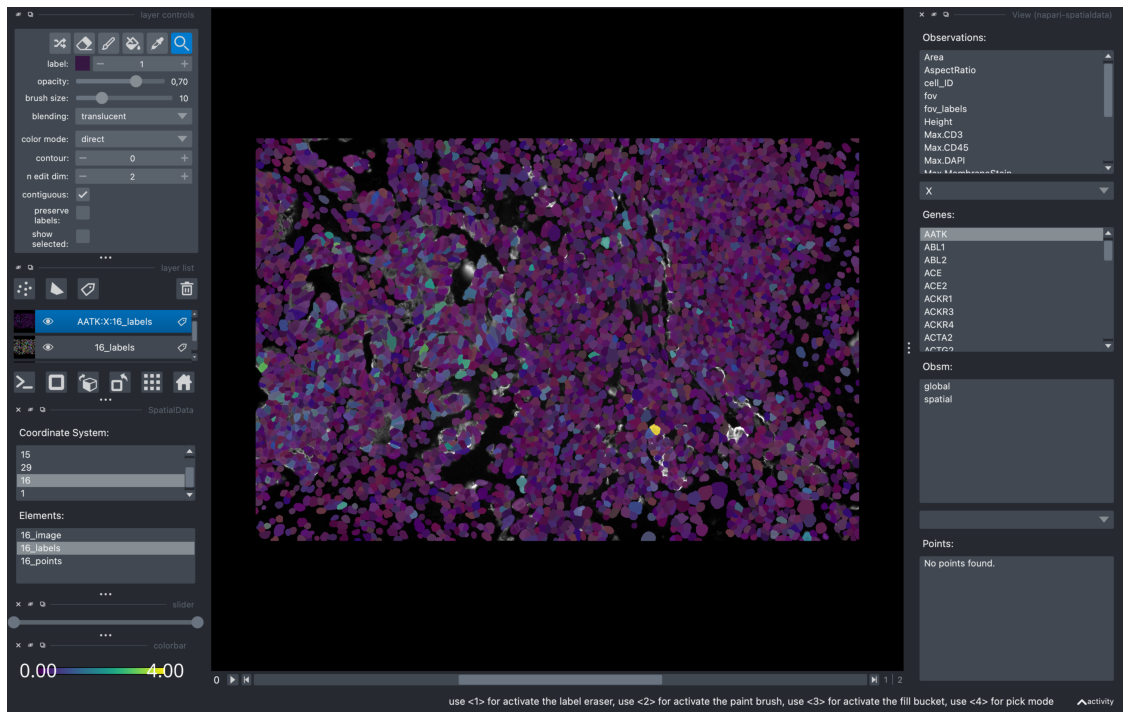

In [7]:
plt.imshow(interactive.screenshot())
plt.axis('off')

## Load axis into scatter widget

Napari-SpatialData also comes with a Scatter widget to visualise points in 2D coordinates.


In the example below, we started again with a setup where we've loaded 16_labels and 16_image to the viewer. We select the layer, "16_labels". Then, we open the Scatter widget by going to Plugins > napari-spatialdata > Scatter. This loads the AnnData object associated with that layer into the "Scatter" Widget.

(-0.5, 2939.5, 1665.5, -0.5)

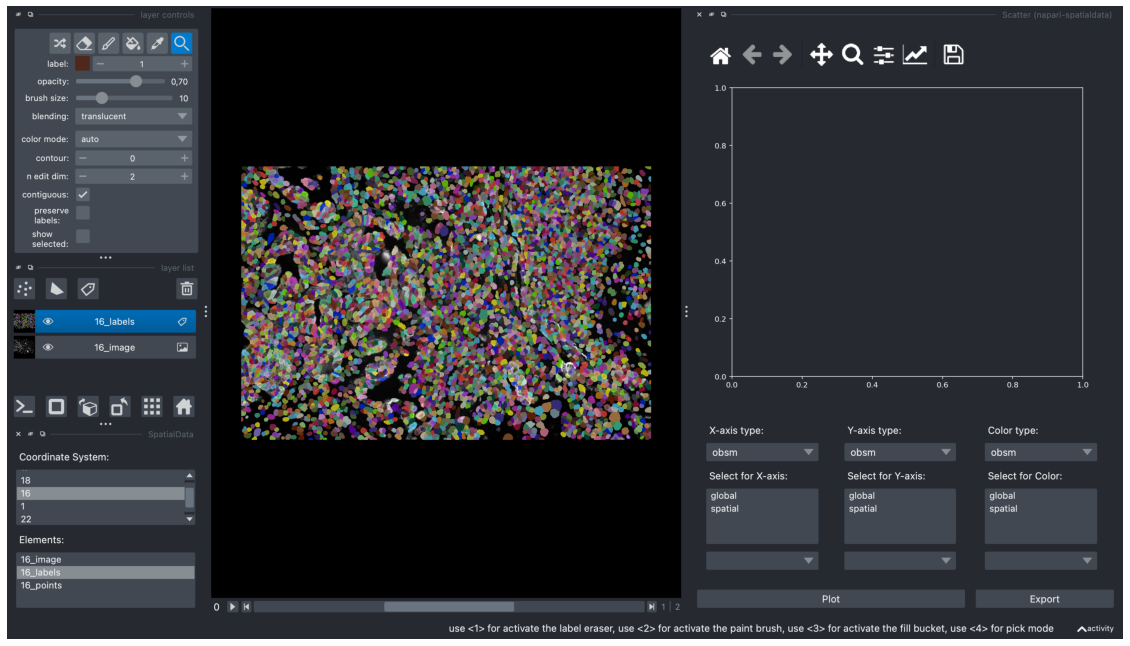

2023-04-18 11:23:16.698 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.


In [3]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can now pick AnnData values to visualise in the scatterplot. 

In the example below, we've selected <em>obsm["global"] </em>, with axis 0 in the x-axis and axis 1 in the y-axis. We're coloring each coordinate by <em>obs["Area"] </em>. Once we've selected the relevant data points, clicking on "Plot" generates a scatterplot.

(-0.5, 2939.5, 1665.5, -0.5)

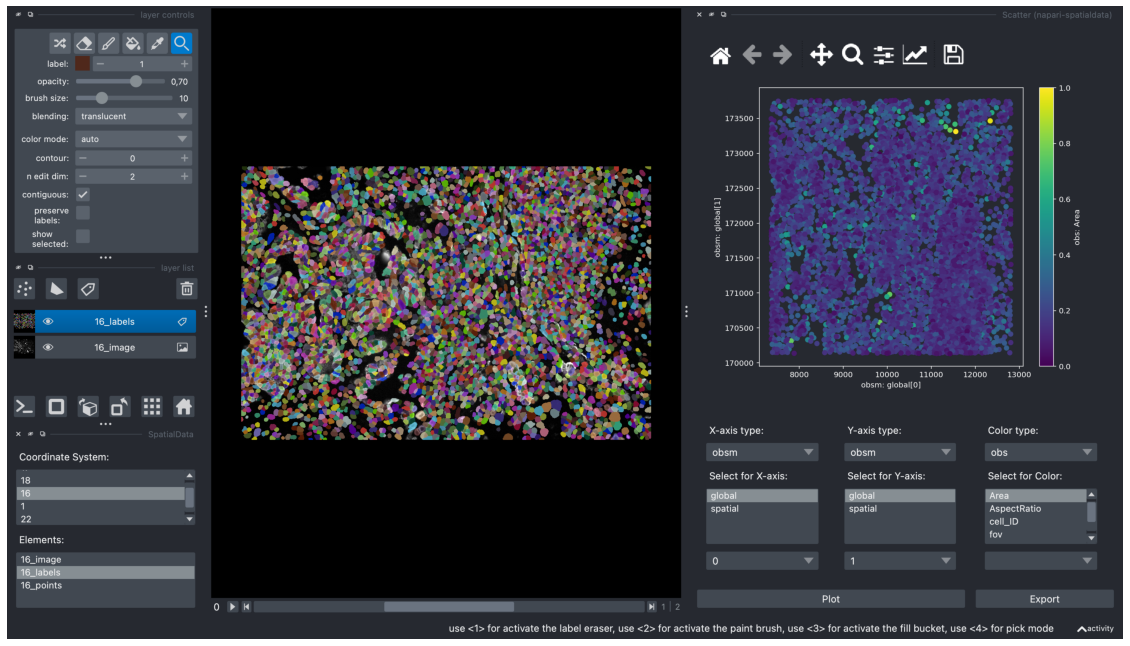

In [4]:
plt.imshow(interactive.screenshot())
plt.axis('off')

The "Scatter" widget also offers an interactive feature to manually select clusters of interest.

In the example below, we used our mouse cursor to select a cluster on the top left area of the scatterplot. The selected points is less transparent than the non-selected points.

(-0.5, 2939.5, 1665.5, -0.5)

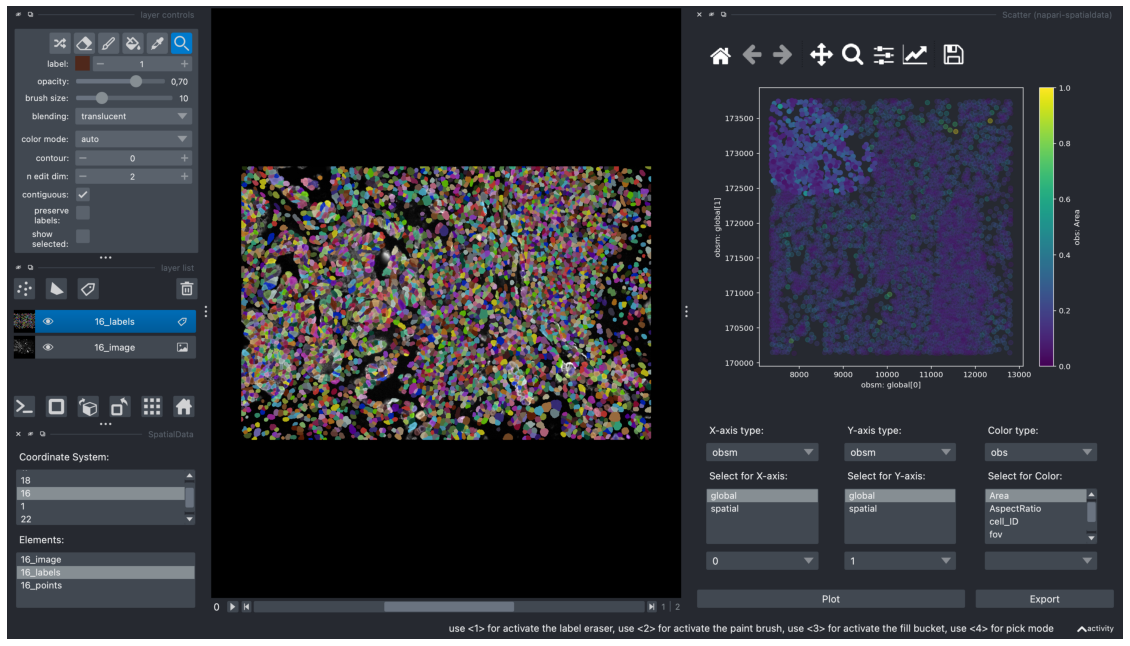

/Users/rahulbshrestha/projects/napari-spatialdata/src/napari_spatialdata/_scatterwidgets.py:96: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_name] = self.exported_data
/opt/homebrew/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/contextlib.py:126: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)
2023-04-18 11:23:43.675 | INFO     | napari_spatialdata._scatterwidgets:export:97 - Exported selected coordinates to obs in AnnData as: 16_labels_LASSO_SELECTED
2023-04-18 11:23:59.053 | DEBUG    | napari_spatialdata._utils:_get_categorical:132 - KEY: 16_labels_LASSO_SELECTED
2023-04-18 11:24:08.947 | INFO     | napari_spatialdata._scatterwidgets:plot:253 - Plotting coordinates.
*

In [5]:
plt.imshow(interactive.screenshot())
plt.axis('off')

After a cluster has been highlighted, it can be exported into AnnData by clicking on the "Export" button. This creates a new obs value, with the suffix "_LASSO_SELECTED".

A new obs_value should be created called "16_labels_LASSO_SELECTED". We will use this as the color type for our scatterplot. The obs box isn't refreshed automatically so when selecting the color type, click on obsm and go back to obs. "16_labels_LASSO_SELECTED" should be visible as the first option. Use this to color the scatterplot.

(-0.5, 2939.5, 1665.5, -0.5)

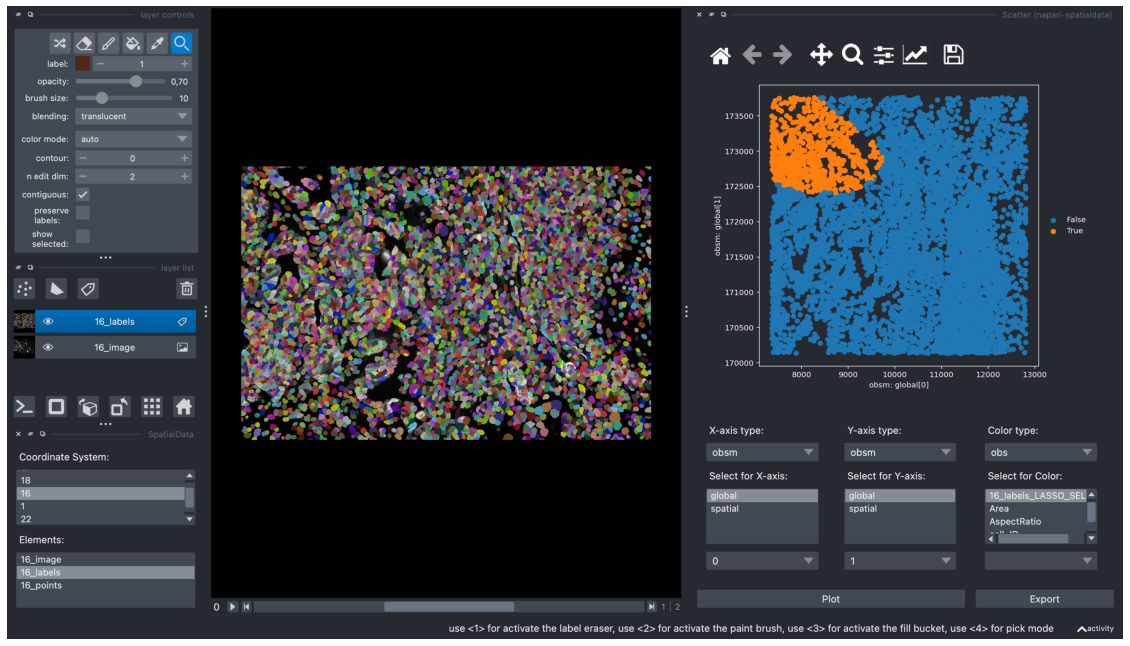

In [6]:
plt.imshow(interactive.screenshot())
plt.axis('off')

We can also view this in the "View" widget and load it as a new layer. After closing this scatter widget and opening the "View" widget, we can see "16_labels_LASSO_SELECTED" in the top of "Observations".

(-0.5, 2939.5, 1857.5, -0.5)

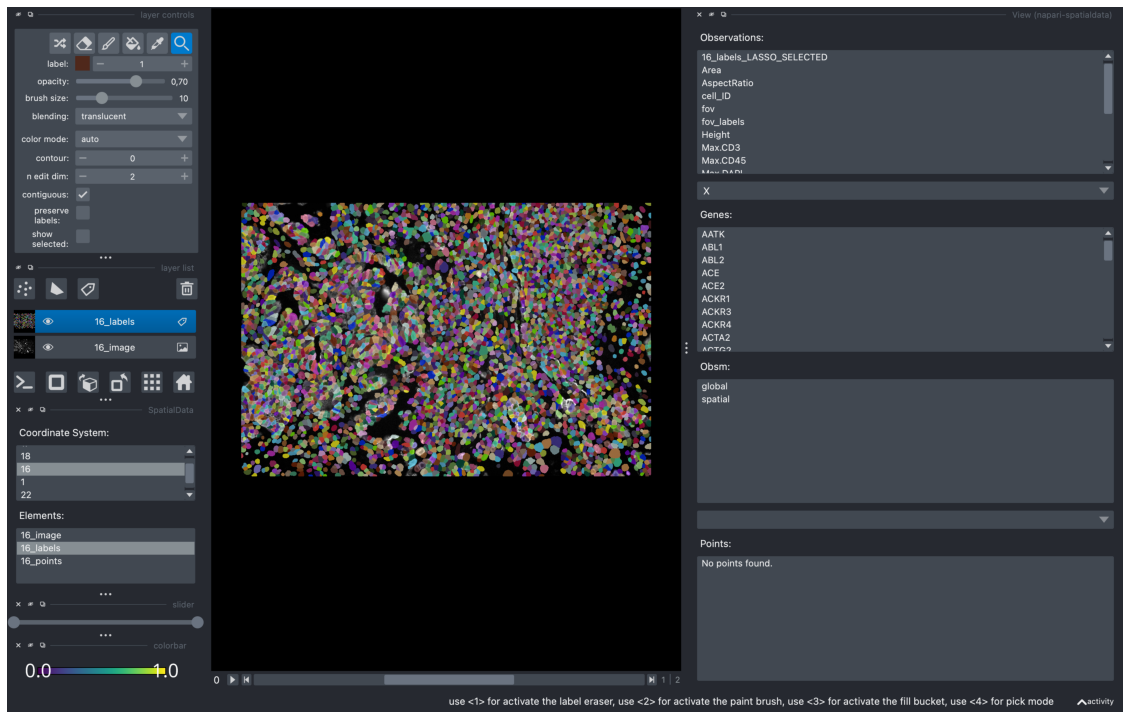

In [7]:
plt.imshow(interactive.screenshot())
plt.axis('off')

Clicking on "16_labels_LASSO_SELECTED" loads it as a new layer to the viewer.

(-0.5, 2939.5, 1857.5, -0.5)

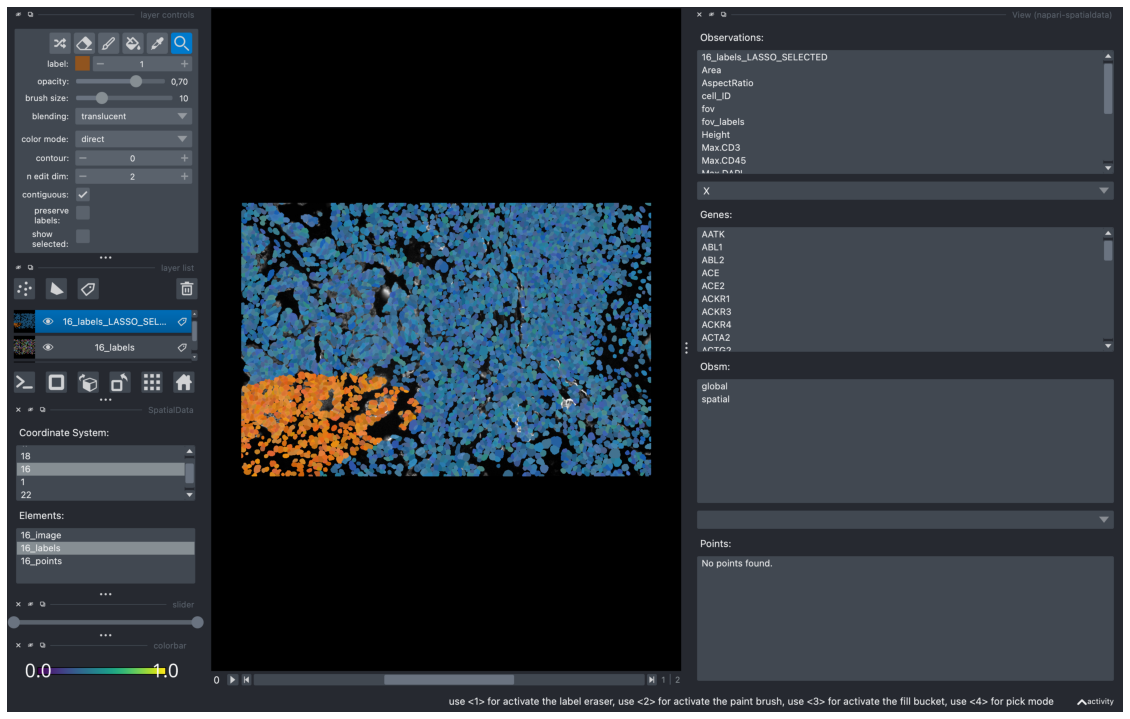

In [9]:
plt.imshow(interactive.screenshot())
plt.axis('off')